# HOUSE PRICE EXPLORATION

Muhammed Adil Yatkın

## Task1

### Business Goals

* Background

In mydataset Clients wants to know more about what is the determining factors about house prices and how can he find the optimum house by his price interval.Also he wants to predict house prices with the help of the information contained in the dataset.Moreover seller also wants to cluster his dataset by its customer preferences and also when seller takes a new house he wants to determine a suitable price for his new selling house

* Business goals

1-Predict the sales of houses

2-Understand which factors are responsible for higher property value

3-Find th optimum houses for clients preferences

* Business success criteria

I have found some interesting patterns in the dataset.Visualizations of this patterns will be provided.I will create a model that predicts house prices.Also I will use multiple linear regression.Also the relationship between the most important determining factors and prices will be provided.Try to find an optimum price house according to clients preferences



## Task 2

* Data requirements: data about  the house sales in King County, Washington State is available in csv format and suitable to work with, and there are not a lot of missing values in the dataset.

In [451]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot") # Plot style

In [452]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [453]:
data_new=data.drop(['date'],axis=1)

In [454]:
data_new.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [455]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_new.drop(['price'],axis=1), data_new['price'], test_size=0.10)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
model.predict(X_test)

array([ 342520.41134814,  544146.96686342,  524513.33898113, ...,
        694749.19065002,  733790.76962143,  590658.91085178])

In [457]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

[[  8.33994243e+05   1.00000000e+00]
 [  2.98717932e+05   1.00000000e+00]
 [  1.47301762e+06   1.00000000e+00]
 [  5.26870040e+05   1.00000000e+00]
 [  2.86039773e+06   1.00000000e+00]]
[1 3 1 ..., 1 1 1]


21597

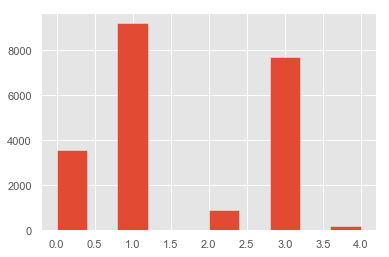

In [458]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=5, random_state=0).fit(pd.DataFrame(data={"price":data["price"],'random':1}))
print(kmeans.cluster_centers_)
plt.hist(kmeans.predict(pd.DataFrame(data={"price":data["price"],'random':1})))
print(kmeans.predict(pd.DataFrame(data={"price":data["price"],'random':1})))
len(kmeans.predict(pd.DataFrame(data={"price":data["price"],'random':1})))


In [459]:
data["class_price"]=kmeans.predict(pd.DataFrame(data={"price":data["price"],'random':1}))
data.head()
                    

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,class_price
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,3
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,3
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,3


* Data source: data avaliable on Kaggle https://www.kaggle.com/swathiachath/kc-housesales-data

1:Lowest price houses
3:lower price houses
0:middle price houses
2:high price houses
4:highest price houses

In [460]:
x=kmeans.predict(pd.DataFrame(data={"price":data["price"],'random':1}))

y=[]
for i in x:
    if i==1:
        y.append(0)
    elif i==3:
        y.append(1)
    elif i==0:
        y.append(2)
    elif i==2:
        y.append(3)
    else:
        y.append(4)

data["class-price"]=y

In [461]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,class_price,class-price
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,1,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,3,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,1,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,3,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,3,1


In [462]:
data_new1=data.drop(['date','class-price'],axis=1)

In [463]:
data_new1.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,class_price
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,3
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,3
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,3


In [464]:
data_new1["class-price"]=y

In [465]:
data_new1.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,class_price,class-price
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,1,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,3,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,1,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,3,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,3,1


In [466]:
data_new1["lat"].head()

0    47.5112
1    47.7210
2    47.7379
3    47.5208
4    47.6168
Name: lat, dtype: float64

In [467]:
data_new1["class-price"].value_counts()

0    9211
1    7714
2    3588
3     908
4     176
Name: class-price, dtype: int64

So in our dataset there are 9211 lowest price houses , 7714 lower price houses , 3588 medium price houses , 908 high price houses 176 highest price houses

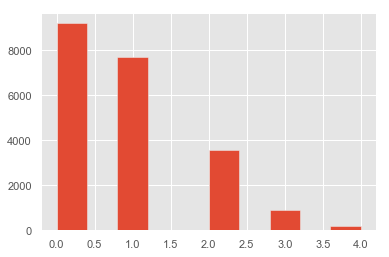

In [468]:
data_new1["class-price"].hist()

[[  47.51905954 -122.14761675]
 [  47.51840873 -122.3635    ]
 [  47.69422    -122.33873127]
 [  47.6325514  -122.02250334]
 [  47.36401041 -122.18093167]
 [  47.70925265 -122.17349799]
 [  47.33571181 -122.32131102]
 [  47.51849679 -121.81688925]
 [  47.57106351 -122.26976425]
 [  47.33861332 -122.03329977]]
[8 2 5 ..., 8 0 8]


21597

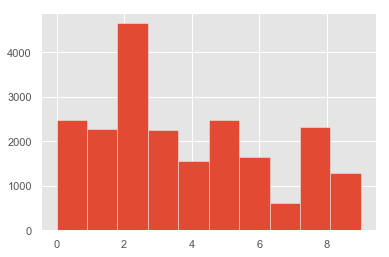

In [469]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(pd.DataFrame(data={"lat":data["lat"],"long":data["long"]}))
print(kmeans.cluster_centers_)
plt.hist(kmeans.predict(pd.DataFrame(data={"lat":data["lat"],"long":data["long"]})))
print(kmeans.predict(pd.DataFrame(data={"lat":data["lat"],"long":data["long"]})))
len(kmeans.predict(pd.DataFrame(data={"lat":data["lat"],"long":data["long"]})))

So we have 10 different region and each class we gave the numbers between 0 and 9

In [317]:
data_new2=data_new1.drop(["lat","long","zipcode","id"],axis=1)

In [318]:
data_new2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,class-price
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,1


In [319]:
z=kmeans.predict(pd.DataFrame(data={"lat":data["lat"],"long":data["long"]}))

In [320]:
data_new2["region-class"]=z

In [321]:
data_new2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,class-price,region-class
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0,8
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,1,2
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0,5
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,1,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,1,3


So we have cleaned our dataset as we created 10 class for houses region also we created 5 different price intervals also we extract the colums id , lat , long and zipcode now we can use some models for making price prediction

In [322]:
new_data=data_new2

In [323]:
new_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,class-price,region-class
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0,8
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,1,2
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0,5
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,1,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,1,3


In [324]:
from sklearn import linear_model

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data.drop(['price'],axis=1), new_data['price'], test_size=0.10)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

a=model.predict(X_test)
b=pd.DataFrame(data={"predict-price":a,"true-price":np.array(y_test)})
b.head()

In [328]:
model.coef_

array([ -2.58102694e+04,   2.04576042e+04,   6.66197747e+01,
        -1.36895642e-01,  -1.46823873e+04,   4.44739713e+05,
         2.30760374e+04,   4.84880487e+03,   3.41564303e+04,
         4.14867554e+01,   2.51330193e+01,  -1.10826098e+03,
         3.04473183e+00,  -2.55904210e+01,  -3.09258082e-01,
         2.56833978e+05,   3.89065558e+03])

So as we see above multiple linear regression model is predicting prices but not very close to actual prices so may be we can do better job with trying other models

In [329]:
new_data[new_data["class-price"]==0]["region-class"].value_counts()

6    1449
4    1416
1    1395
2    1197
0     972
9     945
8     821
5     488
3     300
7     228
Name: region-class, dtype: int64

In [330]:
new_data[new_data["class-price"]==1]["region-class"].value_counts()

2    2251
5    1262
3    1095
0     917
1     654
8     626
7     312
9     296
6     163
4     138
Name: region-class, dtype: int64

In [331]:
new_data[new_data["class-price"]==2]["region-class"].value_counts()

2    946
3    756
5    590
8    472
0    463
1    200
7     75
9     47
6     25
4     14
Name: region-class, dtype: int64

In [332]:
new_data[new_data["class-price"]==3]["region-class"].value_counts()

8    309
2    231
5    129
0    111
3     83
1     30
7      8
6      5
9      2
Name: region-class, dtype: int64

In [333]:
print(max(new_data[new_data["class-price"]==0]["price"]))
print(max(new_data[new_data["class-price"]==1]["price"]))
print(max(new_data[new_data["class-price"]==2]["price"]))
print(max(new_data[new_data["class-price"]==3]["price"]))
print(max(new_data[new_data["class-price"]==4]["price"]))

412500.0
680200.0
1150000.0
2160000.0
7700000.0


In [334]:
new_data1=new_data.drop(["price"],axis=1)

In [335]:
X_train, X_test, y_train, y_test = train_test_split(new_data1.drop(['class-price'],axis=1), new_data1['class-price'], test_size=0.20)

In [336]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [337]:
model.predict(X_test)

array([ 0.45749994,  0.90654963, -0.34088791, ...,  0.43976237,
        1.24938268,  0.73249299])

So for class prediction linear regression is not good we should try KNN

In [338]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
accuracy_score(y_test,neigh.predict(X_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [340]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
accuracy_score(y_test,clf.predict(X_test))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [343]:
from sklearn.ensemble import  AdaBoostClassifier

ABC=AdaBoostClassifier()

ABC.fit(X_train,y_train)

acy_score(y_test,ABC.predict(X_test))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

Therefore I realizedthat making a classification is not a good method for predicting prices only with random forest classifier we are taking 0.75 accuracy score which is not good so lets try regression models

In [345]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import explained_variance_score
import sklearn.learning_curve as curves
from time import time
from sklearn.metrics import r2_score
import os


In [346]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,class-price
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1


Lets try to understand the correlation between the prices and the feature values

In [348]:
# the date,id and class_price are not important for determining price and price is our target variable
data1=data.drop(['date','id','class-price','price'],axis=1)

In [349]:
#price is our target variable
y=data["price"]

In [350]:
correlations = {}
for f in data1.columns:
    data_temp = data[[f,'price']]
    x1 = data_temp[f].values
    x2 = data_temp['price'].values
    key = f + ' vs ' + 'price'
    correlations[key] = pearsonr(x1,x2)[0]

In [351]:
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
sqft_living vs price,0.701917
grade vs price,0.667951
sqft_above vs price,0.605368
sqft_living15 vs price,0.585241
bathrooms vs price,0.525906
view vs price,0.397370
sqft_basement vs price,0.323799
bedrooms vs price,0.308787
lat vs price,0.306692
waterfront vs price,0.266398


In [353]:
#We should create the copy of our data set in order to protect our original dataset
data_train=data.copy()
data_x=data.copy()


In this table we can easily see that what is the most important features for determining the house prices also zipcode is negatively correlated with price so we can easily ignore it

Also we should investigate some variable and how it is related with price value with making visualizations

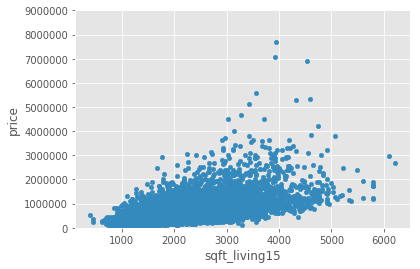

In [354]:
var = 'sqft_living15'
data = pd.concat([data['price'], data[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(3,9000000));

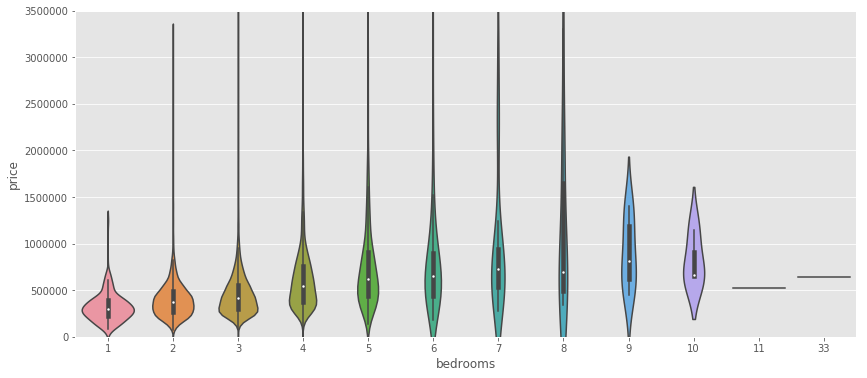

In [360]:
var = 'bedrooms'
data = pd.concat([data_train['price'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.violinplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=3500000);

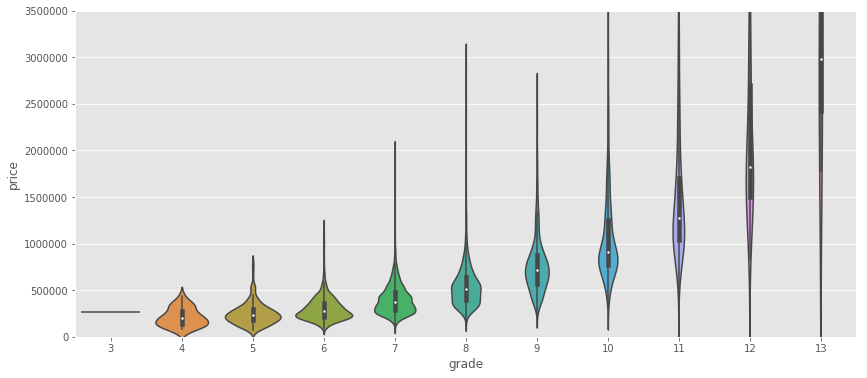

In [359]:
var = 'grade'
data = pd.concat([data_train['price'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.violinplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=3500000);

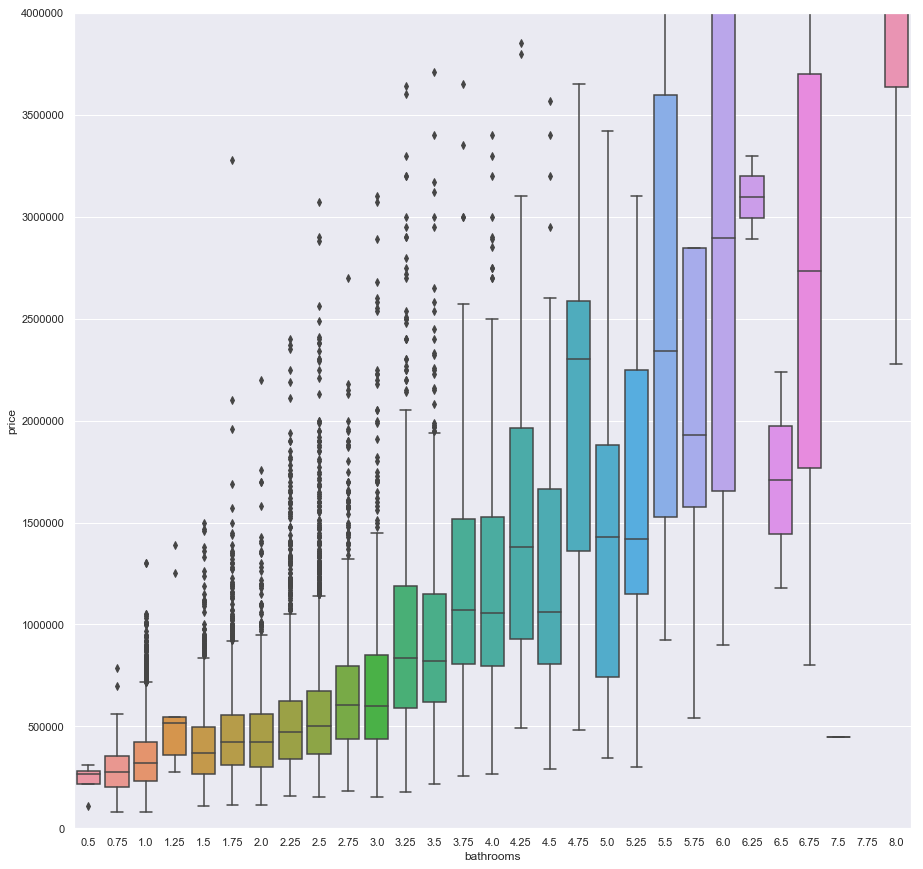

In [371]:
var = 'bathrooms'
data = pd.concat([data_train['price'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 15))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=4000000);

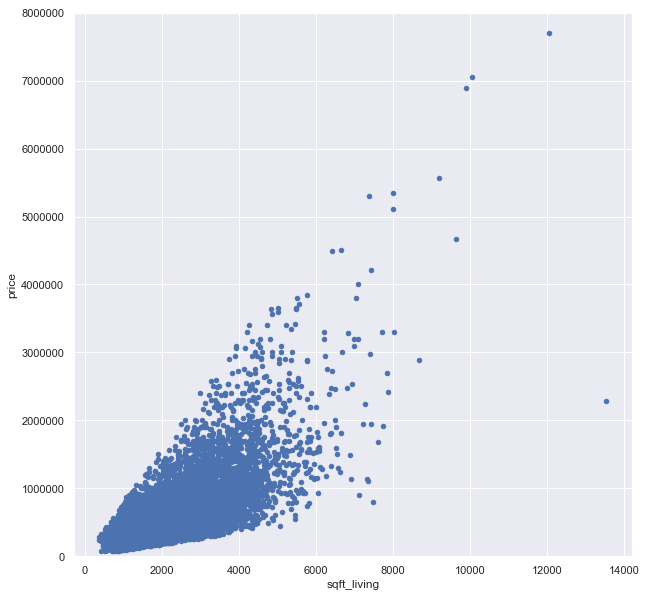

In [368]:
var = 'sqft_living'
data = pd.concat([data_train['price'], data_train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(3,8000000),figsize=(10,10));

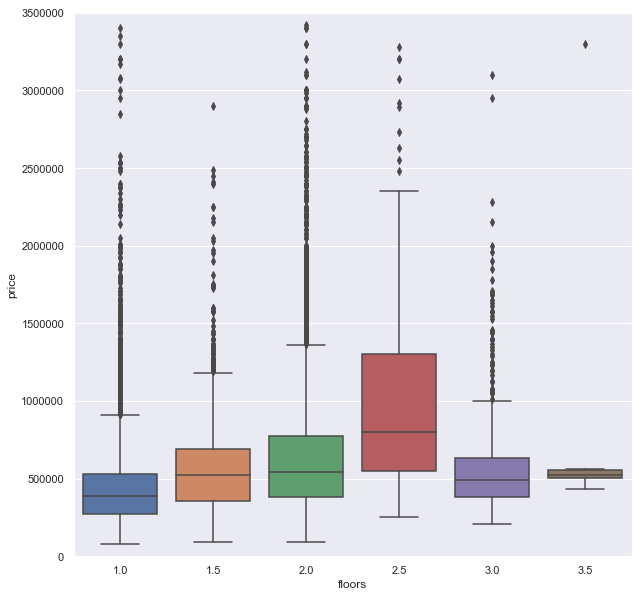

In [367]:
var = 'floors'
data = pd.concat([data_train['price'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=3500000);

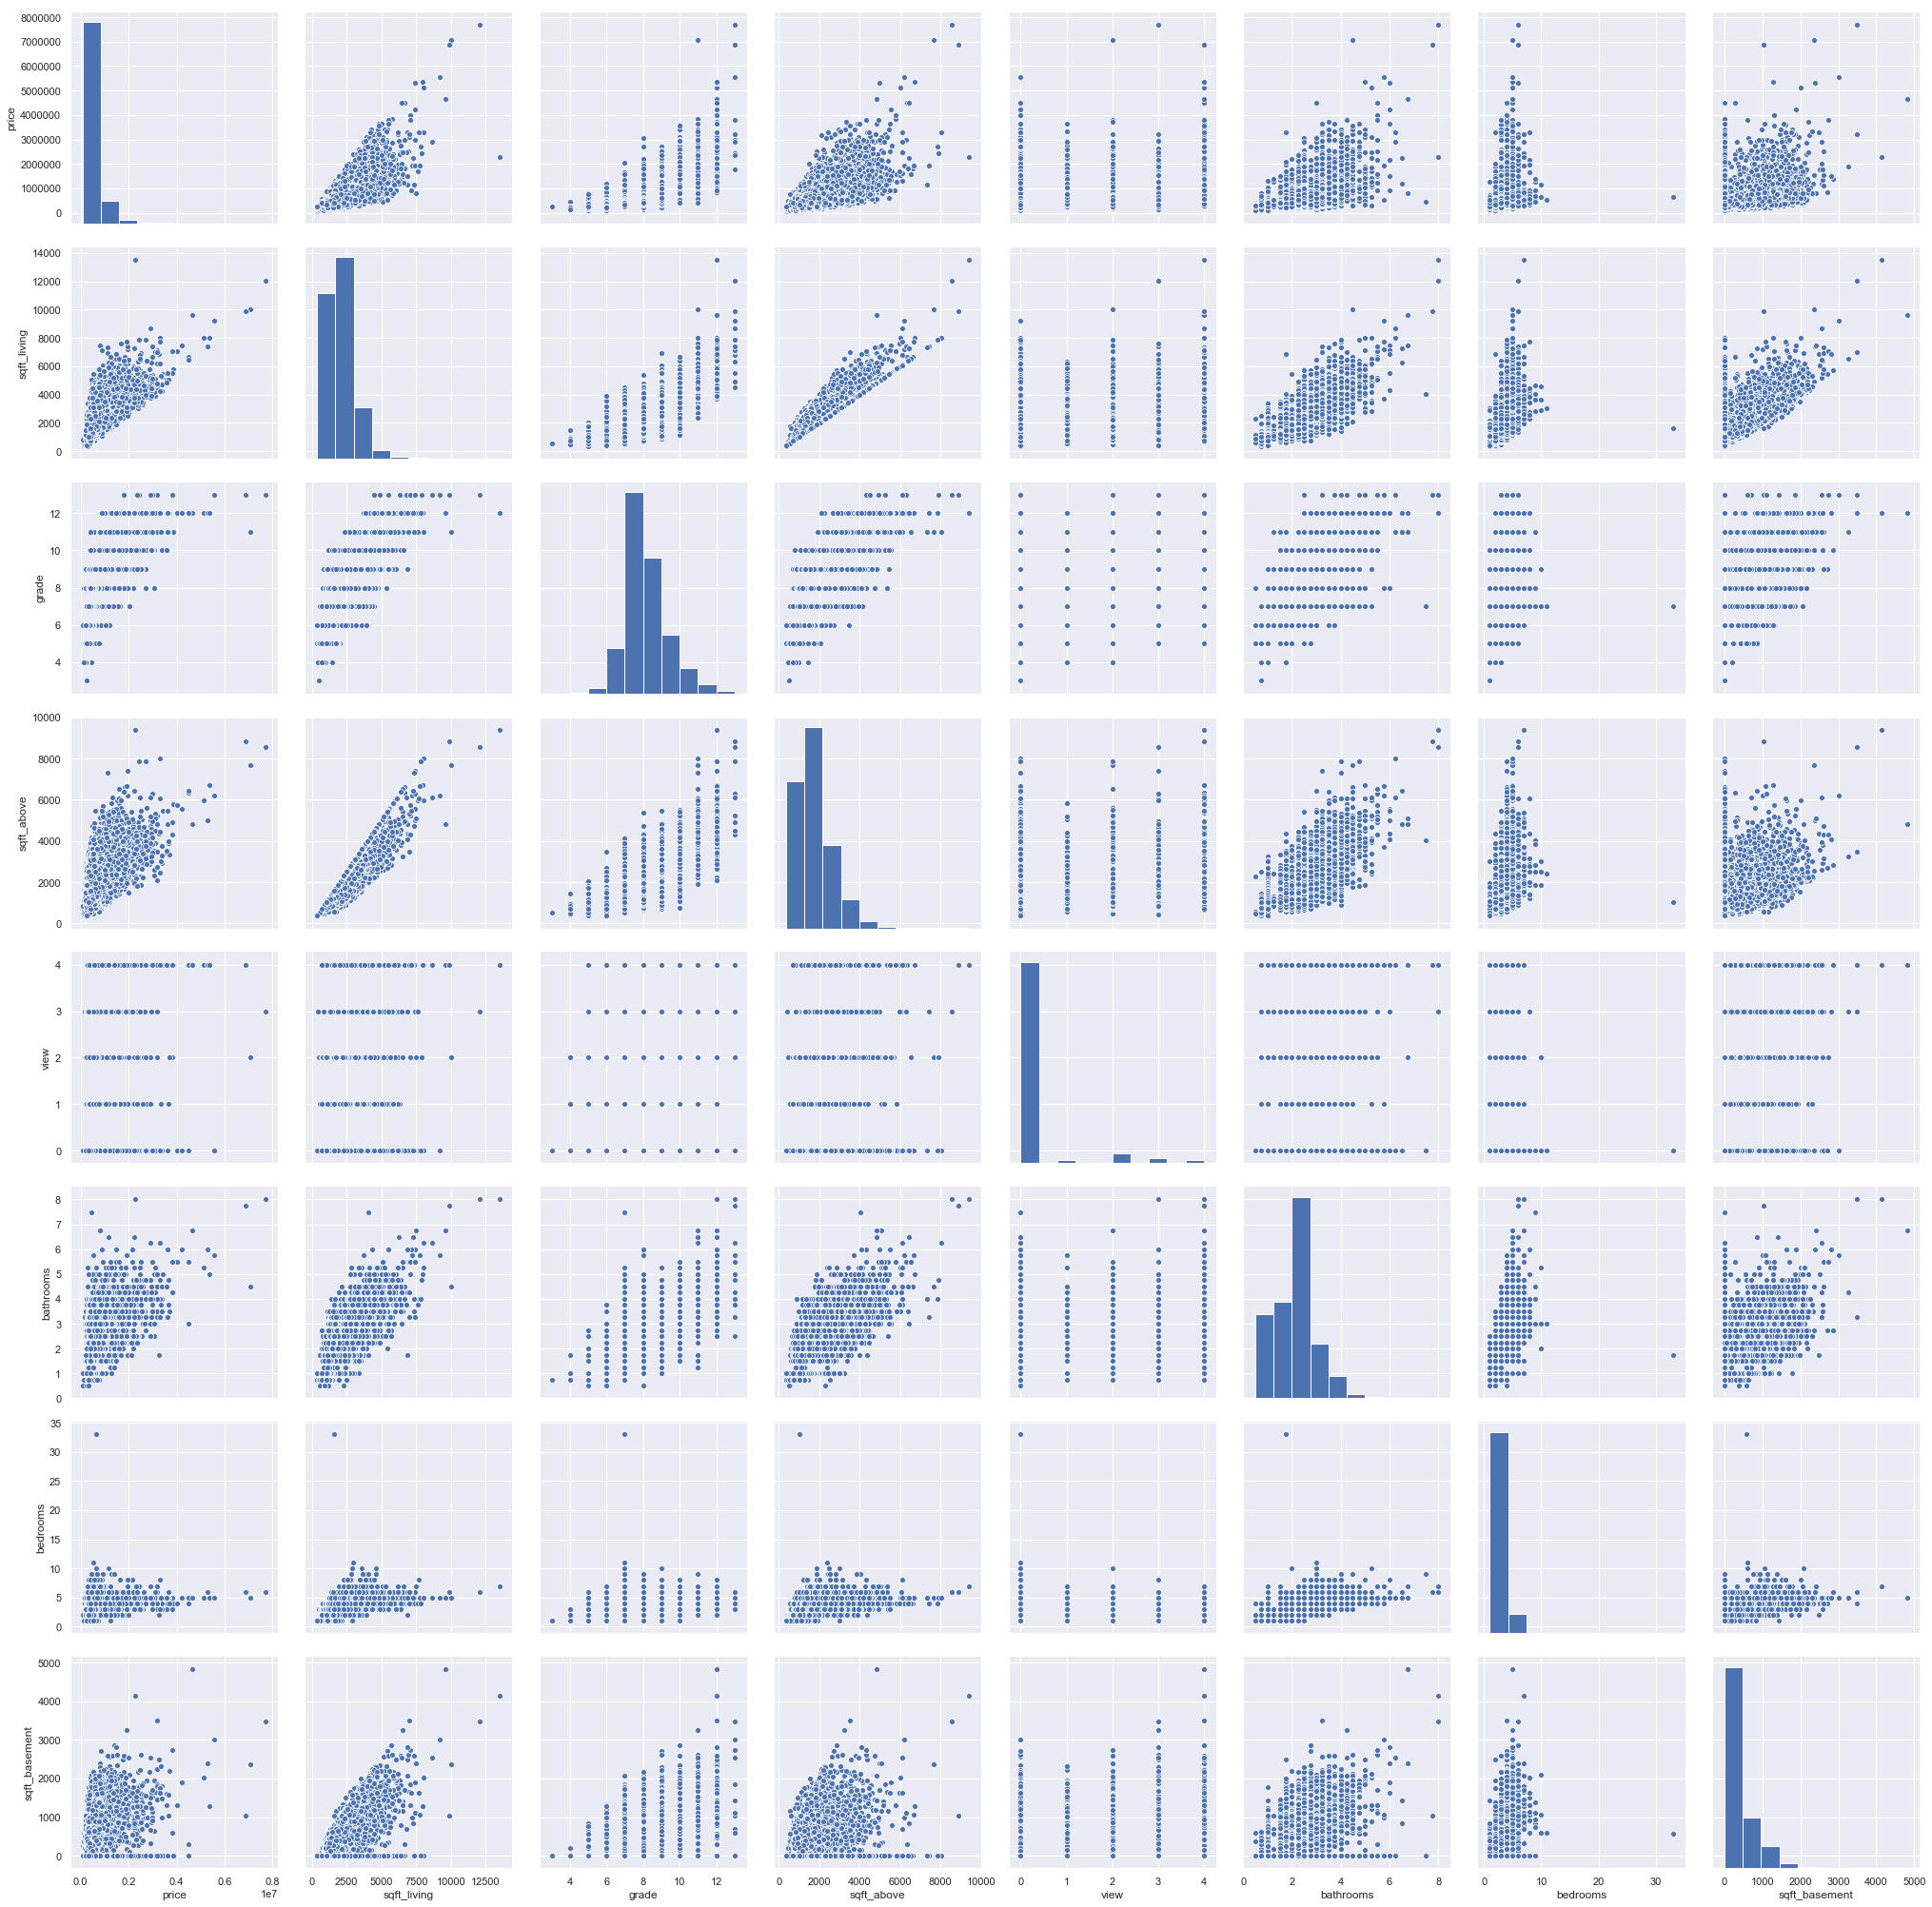

In [365]:
#Pairplots to visualize strong correlation
sns.set()
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'view', 'bathrooms','bedrooms','sqft_basement']
sns.pairplot(data_train[cols], height = 3.5)
plt.show();

After analyzing these plots I decided to extract some features and use 12 features to make a prediction with machine learning models

In [372]:

new_data = data_train[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','waterfront','yr_built','lat','bedrooms','long']]

In [374]:
new_data.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,waterfront,yr_built,lat,bedrooms,long
0,1180,7,1180,1340,1.00,0,0,0,1955,47.5112,3,-122.257
1,2570,7,2170,1690,2.25,0,400,0,1951,47.7210,3,-122.319
2,770,6,770,2720,1.00,0,0,0,1933,47.7379,2,-122.233
3,1960,7,1050,1360,3.00,0,910,0,1965,47.5208,4,-122.393
4,1680,8,1680,1800,2.00,0,0,0,1987,47.6168,3,-122.045


In [375]:
#Our target variable data["price"]
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

# So now we can split our dataset into training and test dataset in here I will use cross-validation with splitting 20% test data and 80% train data

In [399]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(new_data, y ,test_size=0.2)

In [404]:
from sklearn.ensemble import RandomForestRegressor
rand_regr = RandomForestRegressor(n_estimators=100,random_state=0)
rand_regr.fit(X_train, y_train)
random=rand_regr.score(X_test,y_test)
predictions = rand_regr.predict(X_test)
exp_rand = explained_variance_score(predictions,y_test)
print(exp_rand)

0.846148012222


In [401]:
from sklearn.ensemble import GradientBoostingRegressor
est=GradientBoostingRegressor(n_estimators=100, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1).fit(X_train, y_train)
gradient=est.score(X_test,y_test)
pred = est.predict(X_test)
exp_est = explained_variance_score(pred,y_test)
print(exp_est)

0.859738304099


In [406]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=50, learning_rate=0.2,loss='exponential').fit(X_train, y_train)
pred=ada.predict(X_test)
adab=ada.score(X_test,y_test)
predict = ada.predict(X_test)
exp_ada = explained_variance_score(predict,y_test)
print(exp_ada)

0.574478999055


In [405]:
from sklearn.tree  import DecisionTreeRegressor
decision=DecisionTreeRegressor()
decision.fit(X_train, y_train)
decc=decision.score(X_test,y_test)
decpredict = decision.predict(X_test)
exp_dec = explained_variance_score(decpredict,y_test)
print(exp_dec)

0.693158666304


### So we can compare these models that we can see which is better for our prediction

In [407]:
models_cross = pd.DataFrame({
    'Model': ['Gradient Boosting','AdaBoost','Random Forest','Decision Tree'],
    'Score': [gradient,adab,random,decc],
     'Variance Score': [exp_est,exp_ada,exp_rand,exp_dec]})
    
models_cross.sort_values(by='Score', ascending=False)

,Model,Score,Variance Score
0,Gradient Boosting,0.873126,0.859738
2,Random Forest,0.860383,0.846148
1,AdaBoost,0.668568,0.574479
3,Decision Tree,0.651948,0.693159


In [408]:
t=pd.DataFrame({'True':y_test,'Pred':est.predict(X_test)})

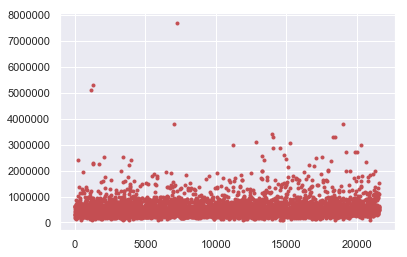

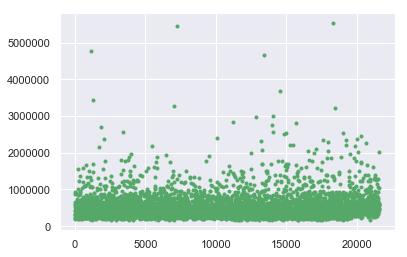

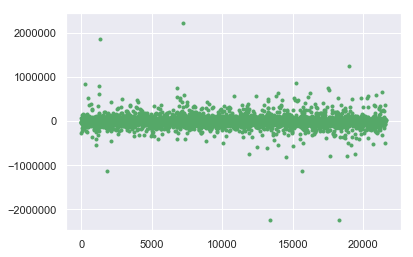

In [428]:
plt.plot(t.index.values,t['True'], 'r.')
plt.show()
plt.plot(t.index.values,t['Pred'], 'g.')
plt.show()
plt.plot(t.index.values,(t['True']- t['Pred']), 'g.')
plt.show()

So, we have seen that accuracy of gradient boosting is around 88.83% and also achieved decent variance score of 0.86 which is very close to 1 . Therefore, it is inferred that Gradient Boosting is the suitable model for this dataset.

The dataset consisted of historic data of houses sold between May 2014 to May 2015.It contains different kind of numerical variables

### Features description:

1. **<font color='red'>id:</font>** a notation for a house
2. **<font color='red'>date:</font>** the date that the house was sold
3. **<font color='red'>price:</font>** price is prediction target
4. **<font color='red'>bedrooms:</font>** number of bedroos/House
5. **<font color='red'>bathrooms:</font>** number of bathrooms/bedrooms
6. **<font color='red'>sqft_living:</font>** square footage of the home
7. **<font color='red'>sqft_lot:</font>** square footage of the lot
8. **<font color='red'>floors:</font>** total floors(level) in the house
9. **<font color='red'>waterfront:</font>** House which has a view to a waterfront
10. **<font color='red'>view:</font>** Has been viewed
11. **<font color='red'>condition:</font>** How good the condition is ( Overall ). 1 indicates worn out property and 5 excellent.
12. **<font color='red'>grade:</font>** overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent.
13. **<font color='red'>sqft_above:</font>** square footage of the house apart from basement
14. **<font color='red'>sqft_basement:</font>** square footage of the basement
15. **<font color='red'>yr_built:</font>** built year
16. **<font color='red'>yr_renovated:</font>** Year when house was renovated
17. **<font color='red'>zipcode:</font>** zip
18. **<font color='red'>lat:</font>** latitude coordinate
19. **<font color='red'>long:</font>** longitude coordinate
20. **<font color='red'>sqft_living15:</font>** Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
21. **<font color='red'>sqft_lot15:</font>** lotSize area in 2015(implies-- some renovations)

In [8]:
print("Number of instances in the dataset: %d\nNumber of different id: %d" % (len(data), len(data.id.unique())))

Number of instances in the dataset: 21597
Number of different id: 21420


In [11]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

As we can see in the above there is no missing values in our dataset

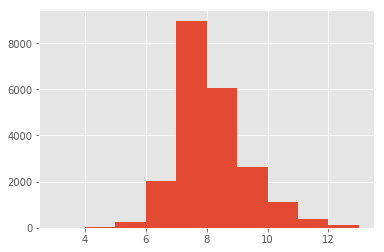

In [15]:
data["grade"].hist();

(array([ 3.,  6.,  2., ...,  0.,  0.,  1.]),
 array([   78.   ,    81.811,    85.622, ...,  7692.378,  7696.189,  7700.   ]),
 <a list of 2000 Patch objects>)

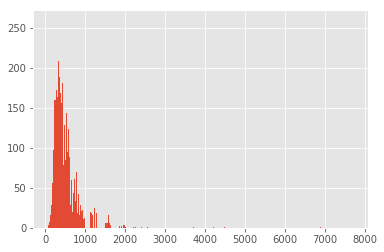

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#data["price"].hist()
plt.hist(data["price"]/1000,bins=2000)

In [32]:
min(data["price"])

78000.0

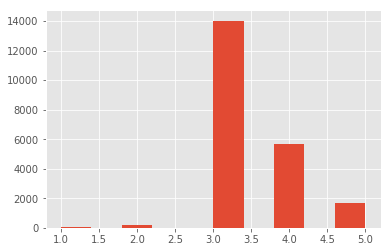

In [16]:
data["condition"].hist();

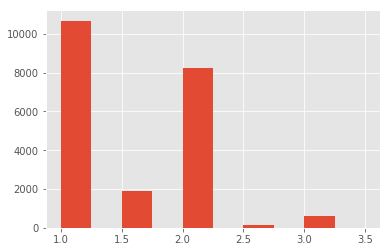

In [18]:
data["floors"].hist();

## Task 3

1. Data exploration: finding interesting patterns, visualisations. Adil - 12 hours
2. Prediction of the price (model selection, parameters tuning etc.) Adil - 12 hours
3. Analysing the results. Adil - 12 hours
4. Poster preparation. Adil - 12 hours